In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize'] = (12, 8)  # Adjust the configuration of plot we will create

In [3]:
df1= pd.read_csv('movies3.csv')
df1


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,13/06/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,02/07/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20/06/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,02/07/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,25/07/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,23/10/2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,07/02/2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,27/04/2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,01/10/2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
#replace rull values by using mode & mean
df1['rating'].fillna(df1['rating'].mode()[0] , inplace = True)
df1['released'].fillna(df1['released'].mode()[0] , inplace = True)
df1['score'].fillna(df1['score'].mean() , inplace = True)
df1['votes'].fillna(df1['votes'].mean() , inplace = True)
df1['writer'].fillna(df1['writer'].mode()[0] , inplace = True)
df1['star'].fillna(df1['star'].mode()[0] , inplace = True)
df1['country'].fillna(df1['country'].mode()[0] , inplace = True)
df1['budget'].fillna(df1['budget'].mean() , inplace = True)
df1['company'].fillna(df1['company'].mode()[0] , inplace = True)
df1['runtime'].fillna(df1['runtime'].mean() , inplace = True)

df1['gross'].fillna(df1['gross'].mean() , inplace = True)

In [5]:
#check null values in data 
df1.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
#check null value %
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,13/06/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,02/07/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20/06/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,02/07/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,25/07/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#convert datatype into intigers
df1['votes'] =df1['votes'].astype('int64')

In [8]:
df1['budget'] =df1['budget'].astype('int64')

In [9]:
df1['gross'] =df1['gross'].astype('int64')

In [10]:
df1['runtime'] =df1['runtime'].astype('int64')

In [11]:
def parse_dates(date):
    for fmt in ('%B %d, %Y', '%d/%m/%Y', '%B %d, %Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the function to the 'released' column
df1['date'] = df1['released'].apply(parse_dates)

# Format the 'date' column to 'yyyy-mm-dd'
df1['date'] = df1['date'].dt.strftime('%Y-%m-%d')

In [12]:
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date
0,The Shining,R,Drama,1980,13/06/1980,8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,02/07/1980,5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20/06/1980,8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20
3,Airplane!,PG,Comedy,1980,02/07/1980,7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02
4,Caddyshack,R,Comedy,1980,25/07/1980,7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,23/10/2020,3.100000,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Universal Pictures,90,2020-10-23
7664,Dream Round,R,Comedy,2020,07/02/2020,4.700000,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020-02-07
7665,Saving Mbango,R,Drama,2020,27/04/2020,5.700000,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020-04-27
7666,It's Just Us,R,Drama,2020,01/10/2020,6.390411,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Universal Pictures,120,2020-10-01


In [42]:
df1.dtypes

name            object
rating          object
genre           object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
released        object
yearcorrect     object
dtype: object

In [13]:
#create correct year column
df1['yearcorrect']=df1['date'].astype(str).str[0:4]

In [14]:
# drop released and year column from data
df1=df1.drop(columns = ['released','year'])

In [15]:
#rename date column as released (make it orginal)
df1=df1.rename(columns ={'date': 'released'})

In [16]:
# round the score column one decimel point using round function
df1['score'] = df1['score'].round(1)
df1

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released,yearcorrect
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Universal Pictures,90,2020-10-23,2020
7664,Dream Round,R,Comedy,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90,2020-02-07,2020
7665,Saving Mbango,R,Drama,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107,2020-04-27,2020
7666,It's Just Us,R,Drama,6.4,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Universal Pictures,120,2020-10-01,2020


In [17]:
#drop duplicates from company 
df1['company'] = df1['company'].drop_duplicates()

In [18]:
#sort values ascending order by gross 
df1 =df1.sort_values(by=['gross'],inplace=False , ascending=False)


In [58]:
#set rows show all data 
pd.set_option('display.max_row', None)

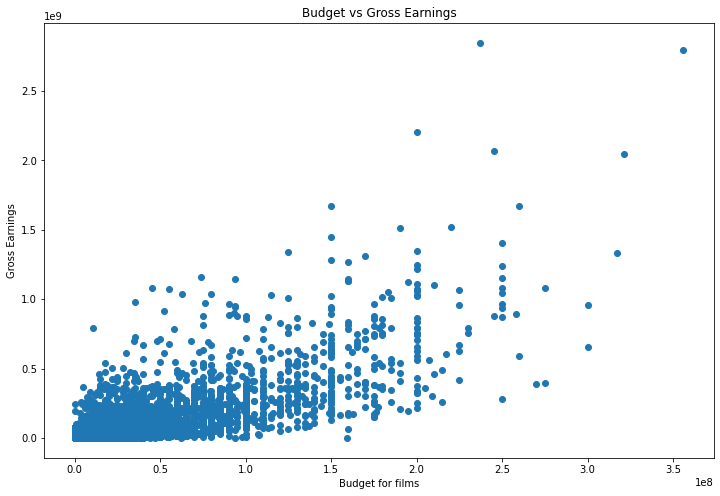

In [19]:
#show correlations between budget vs gross


plt.scatter(x=df1['budget'],y=df1['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for films')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

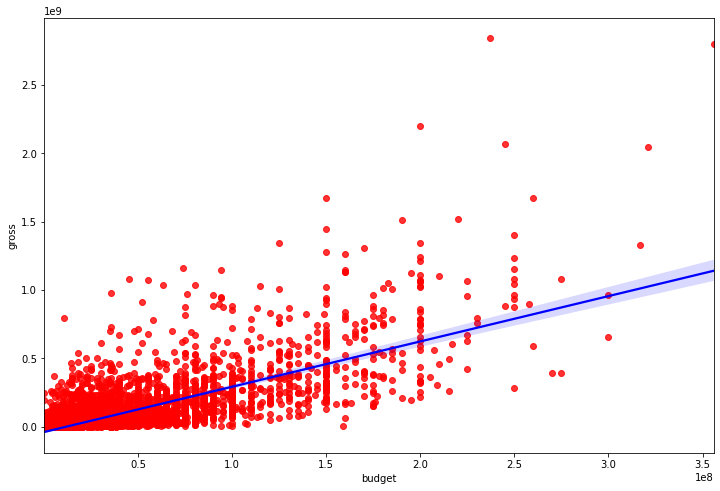

In [20]:
#plot budget vs gross using seaborn 
sns.regplot(x='budget',y='gross' , data= df1 , scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [21]:
#lets start looking at correlations 
df1.corr(method ='pearson') #pearson, kendell, spearman

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.064537,0.182868,0.399335
votes,0.409182,1.000000,0.421007,0.628713,0.309168
budget,0.064537,0.421007,1.000000,0.711270,0.265289
gross,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.399335,0.309168,0.265289,0.241336,1.000000


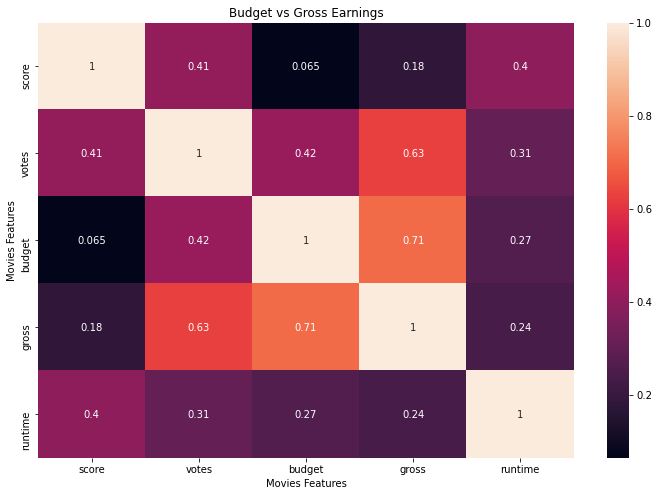

In [22]:
correlation_matrix = df1.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Budget vs Gross Earnings')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')

plt.show()

In [23]:
df_numerized = df1

for col_name in df_numerized:
    if(df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
        

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released,yearcorrect
5445,533,5,0,7.8,1100000,1155,1778,2334,55,237000000,2847246203,-1,162,2099,29
7445,535,5,0,8.4,903000,162,743,2241,55,356000000,2797501328,-1,181,2857,39
3045,6896,5,6,7.8,1100000,1155,1778,1595,55,200000000,2201647264,-1,194,1216,17
6663,5144,5,0,7.8,876000,1125,2550,524,55,245000000,2069521700,-1,138,2601,35
7244,536,5,0,8.4,897000,162,743,2241,55,321000000,2048359754,-1,149,2772,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,6.5,5200,730,1123,2319,54,35589876,1400,-1,103,1452,21
7625,6720,6,4,5.7,320,2546,2565,1915,55,35589876,790,2308,104,2832,39
7580,4664,3,5,5.2,735,1445,2203,2278,55,35589876,682,1992,93,2927,40
2417,3406,6,6,7.3,5100,33,1718,2563,27,11900000,596,-1,134,876,13


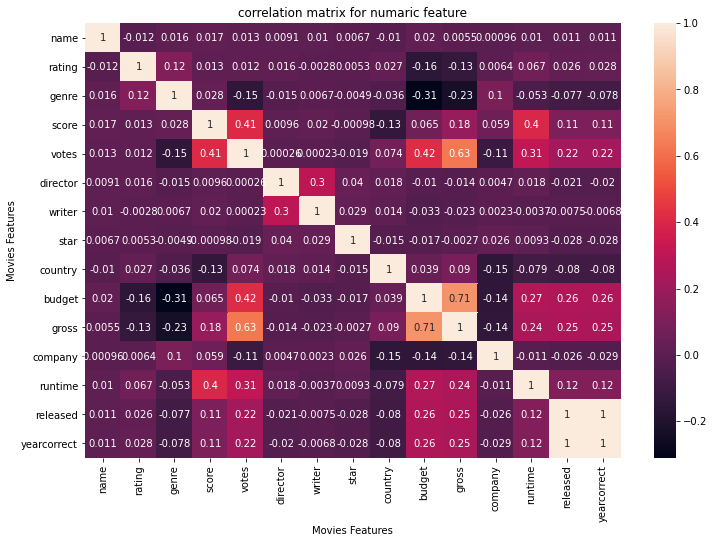

In [25]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation matrix for numaric feature')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')

plt.show()

In [26]:
df_numerized.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released,yearcorrect
name,1.000000,-0.012441,0.016355,0.017096,0.013086,0.009079,0.010018,0.006749,-0.010425,0.020368,0.005466,0.000961,0.010386,0.011333,0.010698
rating,-0.012441,1.000000,0.123465,0.013248,0.012378,0.016255,-0.002795,0.005314,0.026930,-0.156544,-0.130083,0.006383,0.066637,0.026241,0.027921
genre,0.016355,0.123465,1.000000,0.027959,-0.145276,-0.015258,0.006746,-0.004856,-0.035896,-0.310566,-0.230267,0.099779,-0.052701,-0.077366,-0.077865
score,0.017096,0.013248,0.027959,1.000000,0.409182,0.009557,0.019790,-0.000981,-0.134575,0.064537,0.182868,0.059238,0.399335,0.107687,0.106348
votes,0.013086,0.012378,-0.145276,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.421007,0.628713,-0.109974,0.309168,0.218209,0.218476
director,0.009079,0.016255,-0.015258,0.009557,0.000260,1.000000,0.299512,0.039715,0.017926,-0.010364,-0.014272,0.004740,0.017623,-0.020780,-0.019874
writer,0.010018,-0.002795,0.006746,0.019790,0.000232,0.299512,1.000000,0.028745,0.014409,-0.033217,-0.023186,0.002341,-0.003700,-0.007544,-0.006773
star,0.006749,0.005314,-0.004856,-0.000981,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.016952,-0.002683,0.025626,0.009272,-0.027593,-0.027835
country,-0.010425,0.026930,-0.035896,-0.134575,0.073582,0.017926,0.014409,-0.014749,1.000000,0.038620,0.089905,-0.150473,-0.079268,-0.080470,-0.080261
budget,0.020368,-0.156544,-0.310566,0.064537,0.421007,-0.010364,-0.033217,-0.016952,0.038620,1.000000,0.711270,-0.143479,0.265289,0.260569,0.259917


In [27]:
correlation_ma =df_numerized.corr()
corr_pairs = correlation_ma.unstack()

corr_pairs

name         name           1.000000
             rating        -0.012441
             genre          0.016355
             score          0.017096
             votes          0.013086
                              ...   
yearcorrect  gross          0.245749
             company       -0.028910
             runtime        0.120666
             released       0.999331
             yearcorrect    1.000000
Length: 225, dtype: float64

In [30]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.310566
genre        budget        -0.310566
gross        genre         -0.230267
genre        gross         -0.230267
rating       budget        -0.156544
                              ...   
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
released     released       1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64

In [31]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5 ]

high_corr

votes        gross          0.628713
gross        votes          0.628713
budget       gross          0.711270
gross        budget         0.711270
yearcorrect  released       0.999331
released     yearcorrect    0.999331
name         name           1.000000
star         star           1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
released     released       1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and budget have highest correlation to gross earnings
#company has low correlation
# i was worng 